In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import sys
sys.path.append('../../modules')
from helper_functions import feature_reduction_x, rating_feature_conversion, heatmap


from datetime import datetime


C:\Users\Aidan\AppData\Local\Temp\ipykernel_34328\2429794937.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#df = pd.read_csv("../../data/training/ber-rating-dataset-final.csv", sep=';', on_bad_lines="skip", low_memory=False)
df = pd.read_csv("../../data/training/BERRating_test_data.csv", sep=';', on_bad_lines="skip", low_memory=False)

np.random.seed(0)

X = feature_reduction_x(df)

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)
X = imp.transform(X)
y = df.BerRating


X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=2)

c:\Users\Aidan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['SecondEnerConsumedComment' 'ThirdEnerConsumedComment']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\Aidan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 54  65 115 118 119 120 128 129 130] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Aidan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [3]:
start_time = datetime.now()
model = Ridge()
model.fit(X_train , y_train)
y_hat = model.predict(X_test)
end_time = datetime.now()

score = model.score(X_test, y_test)



y_con = rating_feature_conversion(y_test.to_numpy())

Score:  0.8713377244321002 

0.4252
Processing Time: 0:00:02.459508


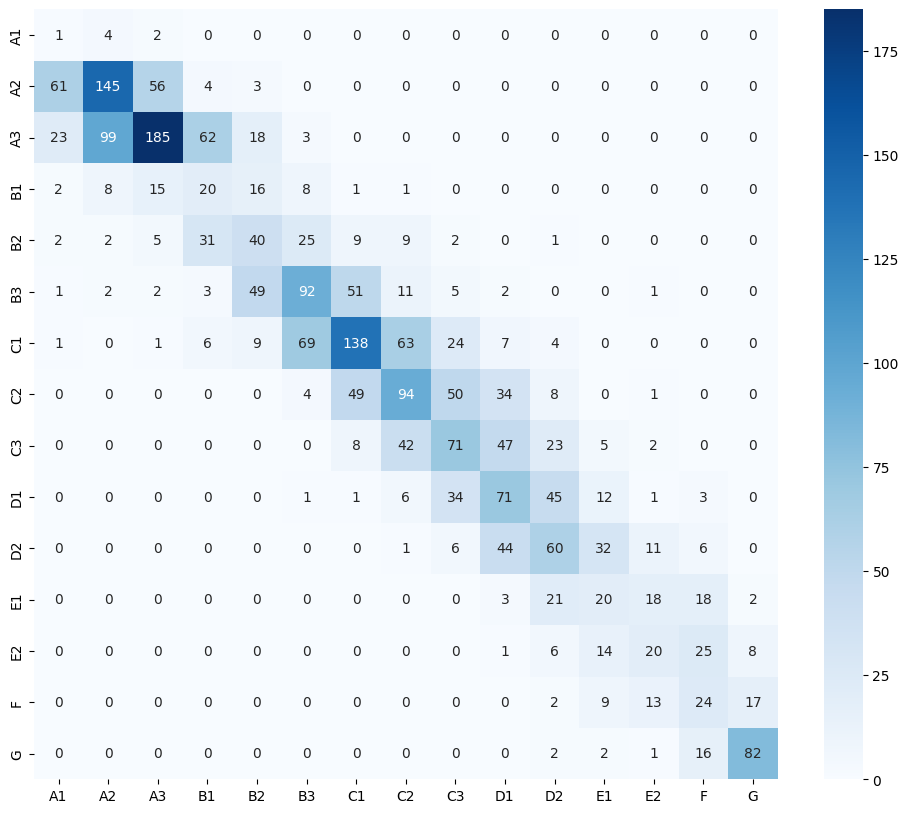

In [7]:
print("Score: ", score, "\n")

y_hat_con = rating_feature_conversion(y_hat)
cm = confusion_matrix(y_con, y_hat_con)


#print("CM")
#print(cm)

print(accuracy_score(y_con, y_hat_con))

print('Processing Time: {}'.format(end_time - start_time))

heatmap(cm)


In [ ]:
from scipy.special import softmax
from helper_functions import feature_reduction_y_grid

#X2 = feature_reduction_y_grid(df)
#imp.fit(X2)
#X2 = imp.transform(X2)

y2 = df.EnergyRating
y_grid = pd.get_dummies(y2)
#softmax(X, y2, Ridge())
#X2_train, X2_test, y2_train, y2_test = train_test_split( X2, y_grid, random_state=2)
X2_train, X2_test, y2_train, y2_test = train_test_split( X, y_grid, random_state=2)

start_time2 = datetime.now()
model = Ridge()
model.fit(X2_train , y2_train)
y_hat2 = model.predict(X2_test)
y_hat_bal = pd.DataFrame(softmax(y_hat2, axis=1), columns = y_grid.columns)
#print(y_hat_bal)
y_true_hat = y_hat_bal.idxmax(axis=1)
end_time2 = datetime.now()
#print(y_hat_bal.idxmax(axis=1))

: 

In [ ]:
#Using softmax
#print(y2_test.idxmax(axis=1))
#print(y_true_hat)
y2_test_con = y2_test.idxmax(axis=1)

cm2 = confusion_matrix(y2_test_con, y_true_hat)

print("CM")
print(cm2)

print(accuracy_score(y2_test_con, y_true_hat))

print('Processing Time: {}'.format(end_time2 - start_time2))

: 